### Kehua Chu (UID: 806153163)

### Import Modules

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from simple_colors import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix

### Problem 3.
### This problem uses the Weekly.csv dataset (uploaded on Bruinlearn) containing 1089 weekly stock returns for 21 years

In [9]:
data = pd.read_csv('Weekly.csv')
data.head(10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down


### a) Use the full dataset to fit a logistic regression of today’s stock movement (up or down) on the five lags of returns and the trading volume.

In [26]:
X = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = data['Direction']

y_binary = pd.get_dummies(y, drop_first=True)

X = sm.add_constant(X)

model = sm.Logit(y_binary, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                0.006580
Time:                        16:52:32   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

### (b) Calculate the confusion matrix, accuracy, precision, recall, and F1 score for the in-sample predictions. Does the model uniformly beat random guessing in terms of these performance metrics?

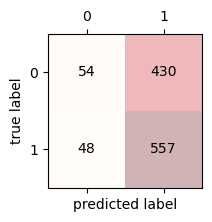

[[ 54 430]
 [ 48 557]]
Accuracy = 0.5610651974288338
Precision =  0.5643363728470111
Recall =  0.9206611570247933
F1 =  0.6997487437185929


In [34]:
# Use 0.5 as threshold 
y_pred = result.predict(X) > 0.5  

cm = confusion_matrix(y_binary, y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
        s=cm[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


Accuracy = accuracy_score(y_binary, y_pred)
Precision = precision_score(y_binary, y_pred)
Recall = recall_score(y_binary, y_pred)
F1 = f1_score(y_binary, y_pred)

print(cm)
print('Accuracy =', Accuracy)
print('Precision = ', Precision)
print('Recall = ', Recall)
print('F1 = ', F1)


Yes, the model uniformly beat random guessing in terms of these performance metrics.

As is mentioned in $Problem2$, the random guessing would lead to the accuracy = 0.5, precision = 0.5, recall = 0.5 and F1 score = 0.5, while our results all exceed these results. So we could conclude that our logistic model shows improvements in terms of accuracy, precision, recall, and F1 score compared to random guessing.

### (c) On the same graph, plot precision and recall against the threshold (varying over [0, 1]) used to generate predicted labels from predicted probabilities. Explain the pattern you see.

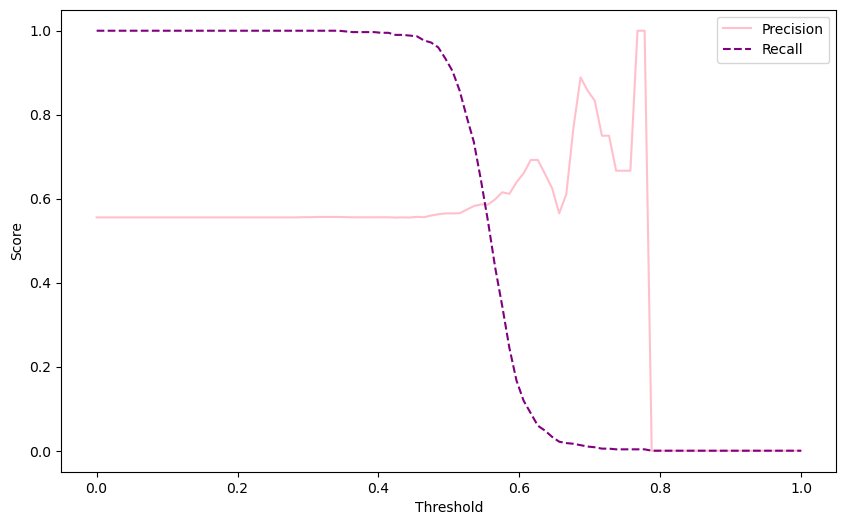

In [63]:
predicted_probabilities = result.predict(X)

thresholds = np.linspace(0, 1, 100)

precisions = []
recalls = []

for threshold in thresholds:

    predicted_labels = (predicted_probabilities > threshold).astype(int)
    
    precision = precision_score(y_binary, predicted_labels, zero_division=0)
    recall = recall_score(y_binary, predicted_labels)
    
    precisions.append(precision)
    recalls.append(recall)


plt.figure(figsize = (10,6))
plt.plot(thresholds, precisions, label='Precision', color = 'pink')
plt.plot(thresholds, recalls, label='Recall', color = 'purple', linestyle = '--')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

The pattern I obeserved is as followed:

1. When the threshold is relatively low (approximately below 0.45), all the samples are classified to positive, so that the recall is around 1; while the threshold increases, the recall decreases simultanously since more and more samples are recognized as FN. And finally, all samples are classified as negative, which results in the recall of 0.

2. As for precision, it's relatively high at first because the model classifies most samples as positive, and in reality, the majority may be positive. However, as the threshold increases, the model demands a higher probability for predicting positive, causing some true positives to be missed, leading to a decrease in precision.

3. As for the turbulence in precision curve, it's may because there is some discontinuous distribution of probabilities assigned by the model for positive class predictions, causing minor changes in the threshold to result in a significant loss of true positives.

### (d) Now fit the logistic regression using only data up to (and including) the year 2008, with Lag2 as the only predictor.

In [12]:
data_2008 = data[data['Year'] <= 2008]

X = data_2008[['Lag2']]
y = data_2008['Direction']

y_binary2 = pd.get_dummies(y, drop_first=True)

X = sm.add_constant(X)

model2 = sm.Logit(y_binary2, X)
result2 = model2.fit()

print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                0.003076
Time:                        23:55:13   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

### (e) Repeat (b) using the remaining observations as a test sample.

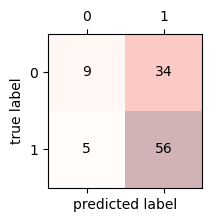

Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Accuracy: 0.625
Precision: 0.6222222222222222
Recall: 0.9180327868852459
F1: 0.7417218543046358


In [18]:
test = data[data['Year'] > 2008]

X_test = test[['Lag2']]
y_test = test['Direction']
y_test = pd.get_dummies(y_test, drop_first=True)


X_test = sm.add_constant(X_test)

test_predictions = result2.predict(X_test) > 0.5

cm = confusion_matrix(y_test, test_predictions)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
        s=cm[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print out the metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

This model beats the random guessing as well, since its accuracy, precision, recall and F1 score are all higher than 50% (the results of random guessing model).

### (f) Which of the two fitted models would you use for real-time stock return prediction?

I would prefer the second model because it has higher accuracy, precision, recall and F1 scores. It makes sense because it only includes Lag2, and from economic intuition we could say that the stock return prediction should be affected mostly by the recent stock return information.